In [59]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [98]:
def model_perform(X_train,y_train, X_test, y_test, model):
    # train 
    model.fit(X_train, y_train)

    # test 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(' MAE {} '.format(mean_absolute_error(y_pred_test,y_test)))
    print(' MSE {} '.format(mean_squared_error(y_pred_test,y_test)))
    print(' R2 {} '.format(r2_score(y_train,y_pred_train)))

    return model, y_pred_test, y_pred_train

def show_error_pattern(y_pred, y_test):
    result_test = pd.DataFrame()
    result_test['score'] = y_pred
    result_test['type'] = 'predict'
    result_test['idx'] = np.arange(result_test.shape[0])

    result_test2 = pd.DataFrame()
    result_test2['score'] = np.squeeze(y_test)
    result_test2['type'] = 'test'
    result_test2['idx'] = np.arange(result_test2.shape[0])

    df_result = pd.concat([result_test2,result_test])

    sns.lineplot(data=df_result, x="idx", y='score', hue="type")



# Load data 

In [136]:
# df = pd.read_csv('data/3_clean_zomato_gof_1000.csv')
df = pd.read_csv('data/3_clean_zomato_feat.csv')
df['rest_price_idr'] = df['rest_price_idr'] / 1000
df['rest_price_idr'] = df['rest_price_idr'].astype(int)
# df['rank_res_type'] = df['rank_res_type'].astype(int)
# df['rank_fac'] = df['rank_fac'].astype(int)

<AxesSubplot:ylabel='Frequency'>

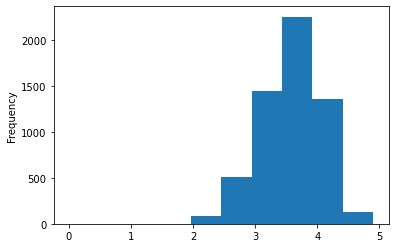

In [137]:
df['rating'].plot(kind='hist')

In [138]:
# df.isnull().sum()

In [139]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,new_code_res_type,rank_res_type,new_code_fac,rank_fac
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150,56.0,-6.167531,106.901752,0,3.8,4,0,4,0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110,61.0,-6.157341,106.907888,1,3.0,0,91,0,1353
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450,363.0,-6.152638,106.892576,0,4.5,2,2,0,907
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100,113.0,-6.163588,106.903689,0,3.9,0,20,0,4
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220,257.0,-6.157255,106.908430,1,4.1,0,275,0,83


In [140]:
# df.info()

In [141]:
df.isnull().sum()

index                0
url                  0
rest_price_idr       0
review               0
lat                  0
long                 0
is_chain             0
rating               0
new_code_res_type    0
rank_res_type        0
new_code_fac         0
rank_fac             0
dtype: int64

# Preprocessing 

In [142]:
# scaler = MinMaxScaler()
# Y = scaler.fit_transform(df[['rating']])
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), Y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), Y, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), df['rating'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), df['rating'], test_size=0.3, random_state=42)

In [143]:
X_train.head()

,rest_price_idr,is_chain,rank_res_type,rank_fac
3071,90,1,139,25
2860,100,0,177,439
4694,100,0,26,19
5696,100,1,7,4
3107,70,0,4,38


In [144]:
X_train.shape

(4642, 4)

 MAE 0.36633482606857976 
 MSE 0.2191306338953765 
 R2 0.8127255130705369 


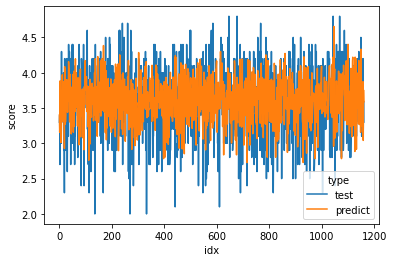

In [145]:
# random forest 

regr = RandomForestRegressor(random_state=0)
model_regr, y_pred_test_regr, y_pred_train_regr  = model_perform(X_train, y_train, X_test, y_test, regr)

show_error_pattern(y_pred=y_pred_test_regr, y_test=y_test)

# show_error_pattern(y_pred=y_pred_train_regr, y_test=y_train)

In [109]:
# show_error_pattern(y_pred=y_pred_train_regr, y_test=y_train)

 MAE 0.364620226934796 
 MSE 0.21898204876223926 
 R2 0.6502822134666157 


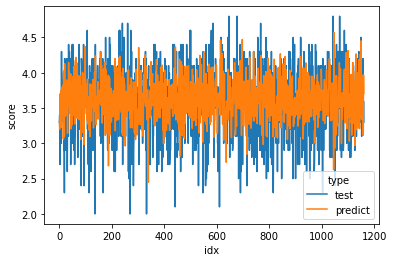

In [146]:
# XGBoost 

xgbr = XGBRegressor(random_state=0)
model_xgbr, y_pred_test_xgbr, y_pred_train_xgbr  = model_perform(X_train, y_train, X_test, y_test, xgbr)

show_error_pattern(y_pred=y_pred_test_xgbr, y_test=y_test)

 MAE 0.40386066706587936 
 MSE 0.2439654010970952 
 R2 0.04889403806207426 


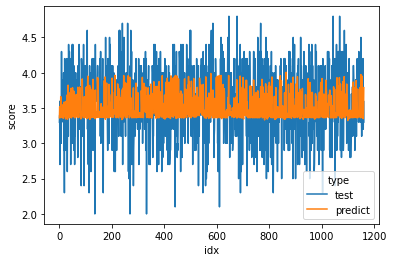

In [147]:
# SVR 
svr = SVR(C=1.0, epsilon=0.2)

scaler=MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
model_svr, y_pred_test_svr, y_pred_train_svr  = model_perform(X_train_scale, y_train, X_test_scale, y_test, svr)

show_error_pattern(y_pred=y_pred_test_svr, y_test=y_test)

In [148]:
# feature importance 
df_feat = pd.DataFrame({'score':model_xgbr.feature_importances_,'columns':X_train.columns})
df_feat.sort_values('score',ascending=False)


,score,columns
0,0.291541,rest_price_idr
1,0.255323,is_chain
2,0.237548,rank_res_type
3,0.215587,rank_fac
